In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [5]:
#Shape of the data set
claimants.shape
claimants.head()
claimants.info()
claimants.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape


(1096, 6)

In [7]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(X,test_size=0.3)
train_Y,test_Y=train_test_split(Y,test_size=0.3)

In [9]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [10]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [11]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': classifier.predict(X)})


In [12]:
y_pred_df

,actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [13]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print (cm)

[[381 197]
 [123 395]]


In [21]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
sensitivity=TP/(TP+FN)
spec=TN/(TN+FP)
precision=TP/(TP+FP)
print(sensitivity,spec,precision)

0.7625482625482626 0.6591695501730104 0.6672297297297297


In [15]:
import numpy as np
Accuracy= np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.708029197080292


In [16]:
cm_test=confusion_matrix(test_Y,classifier.predict(test_x))
print(cm_test)

[[73 91]
 [80 85]]


In [17]:
((159+12)/(159+12+150+8))*100

51.97568389057751

In [27]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})
df_new[df_new["fpr"]>=0.22]


,fpr,tpr,cutoff
194,0.226644,0.611969,5.863961e-01
195,0.226644,0.617761,5.840530e-01
196,0.228374,0.617761,5.837444e-01
197,0.228374,0.619691,5.837411e-01
198,0.233564,0.619691,5.827332e-01
...,...,...,...
441,0.920415,0.996139,4.400998e-02
442,0.920415,0.998069,4.279163e-02
443,0.929066,0.998069,2.220543e-02
444,0.929066,1.000000,2.083514e-02


Text(0, 0.5, 'True Positive Rate')

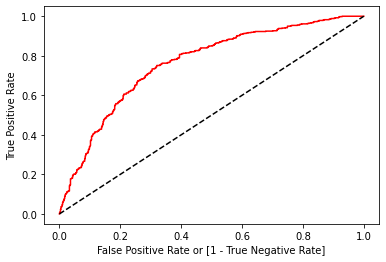

In [23]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [24]:
auc

0.7108589063606365

In [25]:
prob=classifier.predict_proba(X)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': Y,"pred":0})
new_pred.loc[prob>0.58,"pred"]=1
new_pred

,actual,pred
0,0,0
1,1,0
2,1,0
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [28]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new
print(classification_report(new_pred.actual,new_pred.pred))


              precision    recall  f1-score   support

           0       0.69      0.76      0.73       578
           1       0.70      0.62      0.66       518

    accuracy                           0.70      1096
   macro avg       0.70      0.69      0.69      1096
weighted avg       0.70      0.70      0.70      1096

